In [242]:
from PIL import Image, ImageOps
import cv2

Step 1: Make all Transparent

In [243]:
folder_name = '../themes/minecraft//' 
f_names =  ['enemy1.jpg','enemy2.png','enemy3.png','enemy4.png']
# f_names =  ['enemy1.jpg','enemy2.jpg','enemy3.jpg','enemy4.jpg']
# f_names =  ['enemy1.png']*4
# f_names= ['png27.png','png28.png','png31.png','png32.png']
# f_names= ['Mac512.png','Mace.png','Saw.png','Mace.png']
# f_names = ['player.jpg']

In [244]:
datas[4]

(255, 255, 255, 0)

In [235]:
col = (30,30,30)
def check_color(item):
    thresh = 30
    if abs(item[0]-col[0])<thresh and abs(item[2]-col[2])<thresh and abs(item[2]-col[2])<thresh:
        return True
    return False

for file in f_names:
    fn_name = f'{folder_name}/{file}'
    fn_out_name = fn_name
    
    img = Image.open(fn_name)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = []
    tot = 0
    i = 0
    j = 0
    
    w,h = img.width,img.height

    for item in datas:
        if(j==w):
            j = 0
            i+=1
        if item[0] > 200 and item[1] >200 and item[2] >200:
#         if(check_color(item)):
            tot+=1
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
        j+=1
    img.putdata(newData)
    img.save(fn_out_name, "PNG")

Now Resize Them

In [245]:
for file in f_names:
    fn_name = f'{folder_name}/{file}'
    fn_out_name = fn_name
    img = Image.open(fn_name)
    img = img.convert("RGBA")
    img = img.resize((141,171))
    img.save(fn_out_name, "PNG")

## Define Orientation Order

In [246]:
orien = [1,1,1,1]

## Stack Them All!!!

In [247]:
def get_concat_h_cut(im1, im2):
    dst = Image.new('RGBA', (im1.width + im2.width, min(im1.height, im2.height)))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v_cut(im1, im2):
    dst = Image.new('RGBA', (min(im1.width, im2.width), im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [248]:
final_img = None
i = 0
for file in f_names:
    fn_name = f'{folder_name}/{file}'
    img = Image.open(fn_name)
    img = img.convert("RGBA")
    img_flip = ImageOps.mirror(img)
    if(orien[i]==0):
        horiz = get_concat_h_cut(img,img_flip)
    else:
        horiz = get_concat_h_cut(img_flip,img)
    if i==0:
        final_img = horiz
    else:
        final_img = get_concat_v_cut(final_img,horiz)
    i+=1
        

In [249]:
# final_img = get_concat_v_cut(final_img,horiz)

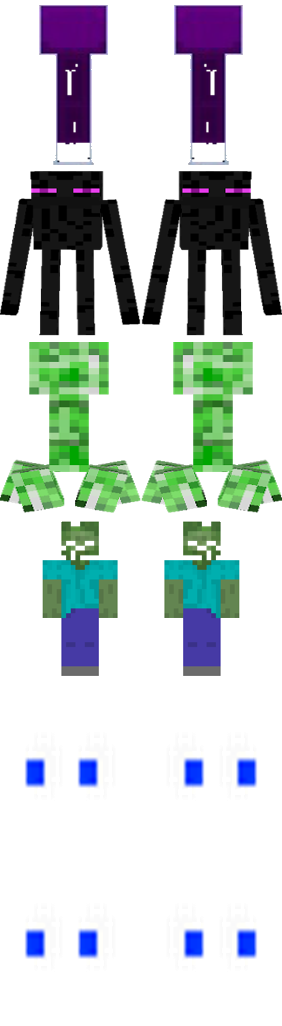

In [250]:
eyes = Image.open('../themes/eyes_final.png')
eyes = eyes.convert("RGBA")
final_img = get_concat_v_cut(final_img,eyes)
final_img

In [251]:
final_img.save(f'{folder_name}/enemy.png',"PNG")

In [34]:
final_img = get_concat_v_cut(final_img,horiz)

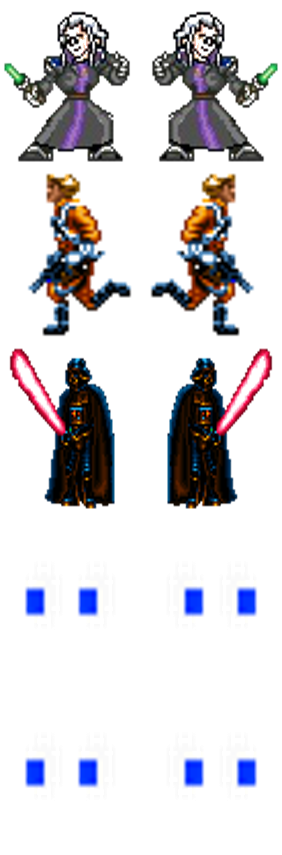